In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from msfm.utils import analysis
from astropy.io import fits

In [18]:
n_side = 512
n_pix = hp.nside2npix(n_side)

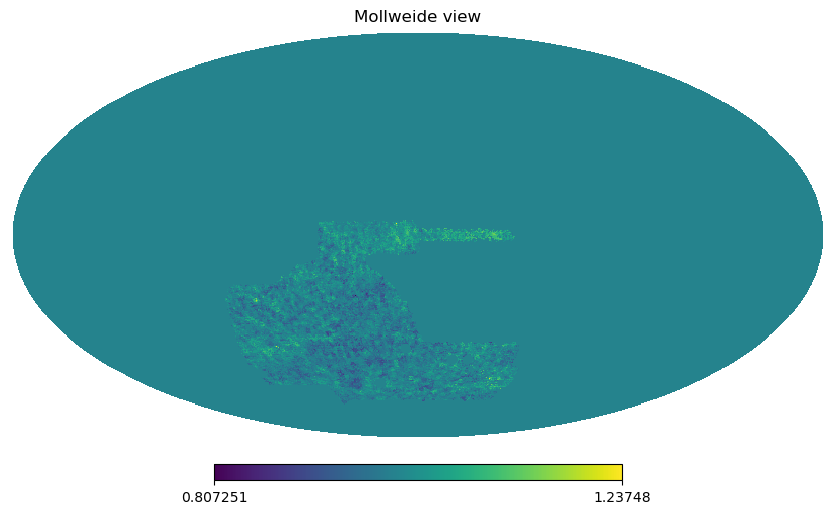

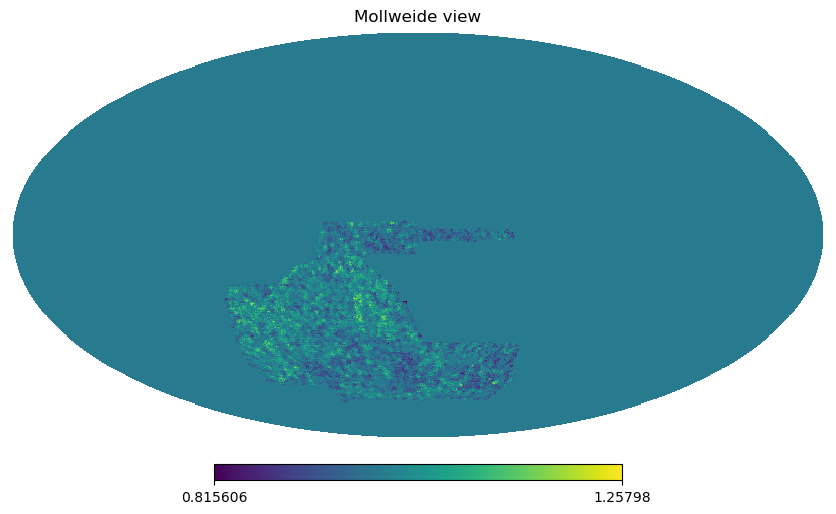

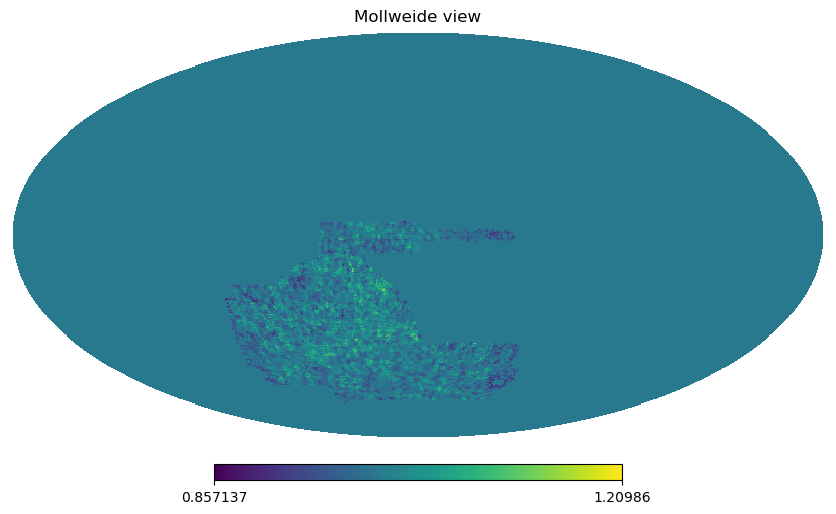

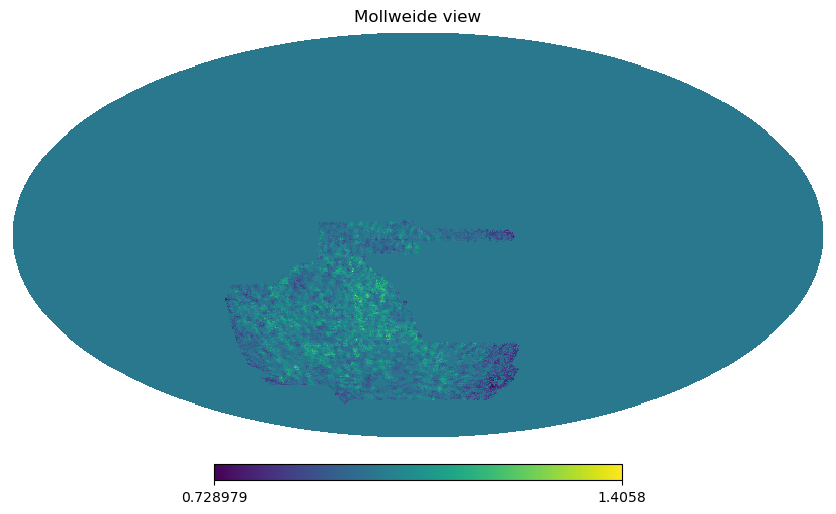

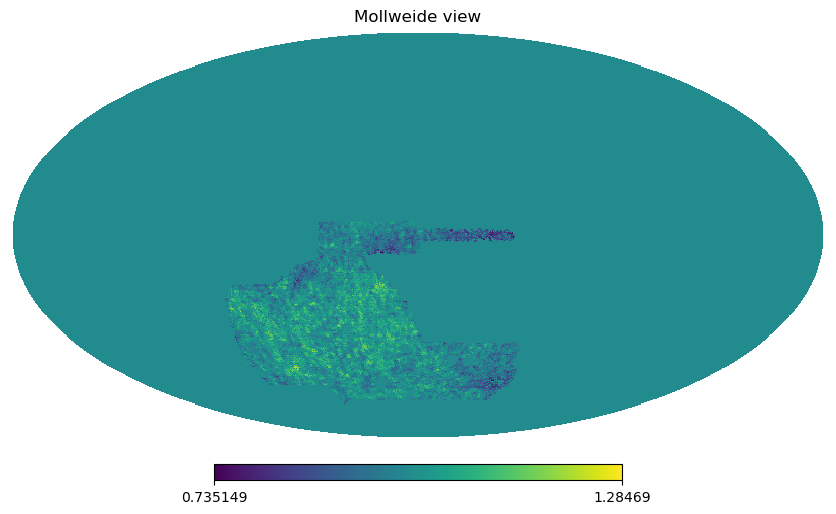

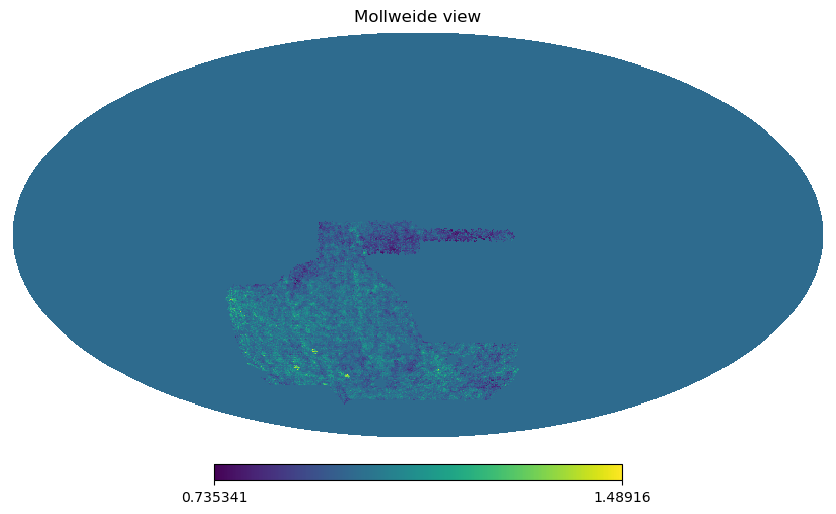

In [50]:
for i in range(6):
    map_file = f"/Users/arne/data/DESY3/systematics_analysis/pca_tests/maglim_v2.2_new_zbinning_jointmask/pca_107_maps/jointmask_w_maps_nbins1d_10_2.0sig_pca_maps_107_50_cut/w_map_bin{i}_nside4096_nbins1d_10_2sig_v2.0.fits.gz"
    data, header = fits.getdata(map_file, header = True)

    sys_map = np.full(hp.nside2npix(4096), 1.0)
    sys_map[data["HPIX"]] = data["VALUE"]

    hp.mollview(sys_map)

In [7]:
map_file = "/Users/arne/data/DESY3/systematics_analysis/pca_tests/maglim_v2.2_new_zbinning_jointmask/pca_107_maps/jointmask_w_maps_nbins1d_10_2.0sig_pca_maps_107_50_cut/w_map_bin0_nside4096_nbins1d_10_2sig_v2.0.fits.gz"

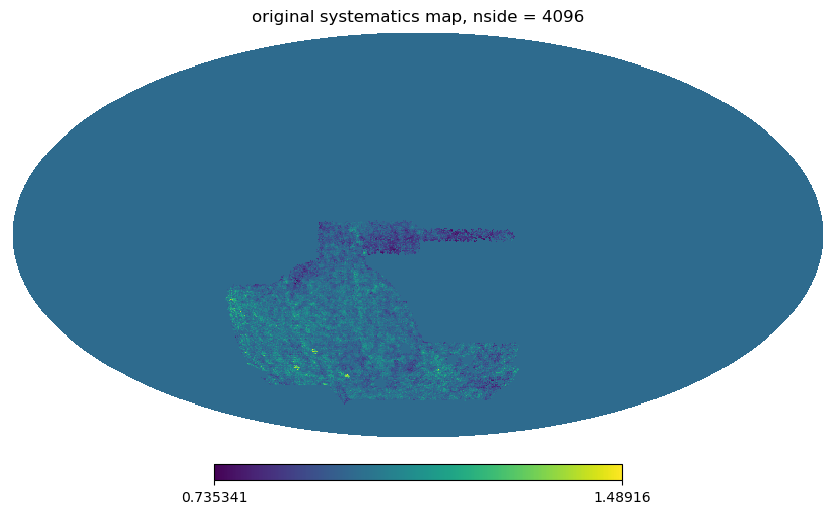

In [51]:
data, header = fits.getdata(map_file, header = True)

sys_map = np.full(hp.nside2npix(4096), 1.0)
sys_map[data["HPIX"]] = data["VALUE"]

hp.mollview(sys_map, title="original systematics map, nside = 4096")

(array([1.620000e+02, 4.619000e+03, 6.331590e+05, 8.707239e+06,
        9.709548e+06, 1.321798e+06, 3.854900e+04, 1.087000e+03,
        3.130000e+02, 5.600000e+01]),
 array([0.75599733, 0.81579728, 0.87559723, 0.93539718, 0.99519713,
        1.05499708, 1.11479703, 1.17459698, 1.23439693, 1.29419688,
        1.35399683]),
 <BarContainer object of 10 artists>)

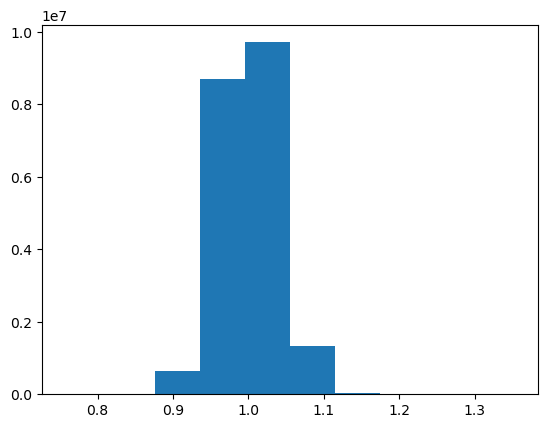

In [9]:
plt.hist(data["VALUE"])

In [41]:
# rot_mask_512 = hp.ud_grade(rot_mask_4096, nside_out=512, power=0)
rot_mask_512 = hp.ud_grade(rot_mask_4096, nside_out=512)

assert np.all(hp.ud_grade(rot_mask_4096, nside_out=512) == hp.ud_grade(rot_mask_4096, nside_out=512, power=0))

In [36]:
unique, counts = np.unique(rot_mask_512, return_counts=True)

In [40]:
counts

array([2775286,    1203,     738,     769,     685,     613,     699,
           627,     619,     622,     657,     615,     631,     655,
           672,     745,     720,     814,     812,     890,     860,
           925,     968,     974,    1059,    1176,    1205,    1308,
          1359,    1448,    1610,    1670,    1753,    1940,    2066,
          2140,    2411,    2515,    2795,    3104,    3300,    3546,
          3907,    4280,    4656,    5030,    5535,    6200,    6710,
          7651,    8280,    9329,   10164,   11560,   12443,   14103,
         15623,   17367,   19263,   21347,   23454,   24210,   26083,
         21284,   38045])

370442


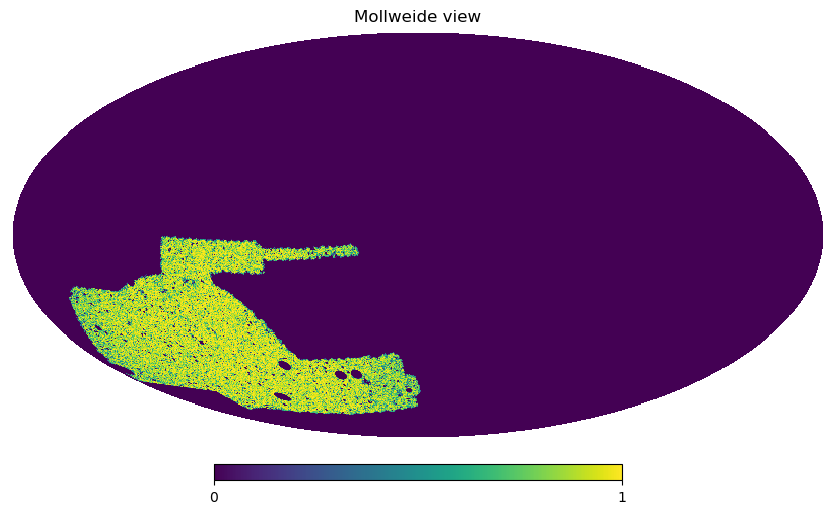

In [47]:
rot_mask_512_new = hp.ud_grade(rot_mask_4096, nside_out=512)

hp.mollview(rot_mask_512_new)
print(len(np.nonzero(rot_mask_512_new)[0]))

38045


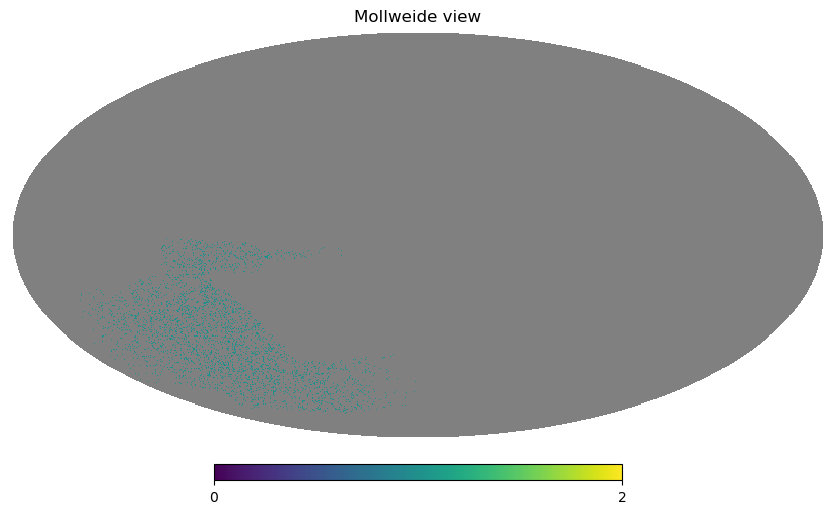

In [49]:
rot_mask_4096_bad = rot_mask_4096
rot_mask_4096_bad[rot_mask_4096_bad == 0] = hp.UNSEEN

rot_mask_512_new = hp.ud_grade(rot_mask_4096_bad, nside_out=512, pess=True)

hp.mollview(rot_mask_512_new)
print(np.sum(rot_mask_512_new != hp.UNSEEN))

(array([  5334.,   3799.,   4653.,   7167.,   9148.,  13867.,  27823.,
         43705.,  81260., 173686.]),
 array([0.015625 , 0.1140625, 0.2125   , 0.3109375, 0.409375 , 0.5078125,
        0.60625  , 0.7046875, 0.803125 , 0.9015625, 1.       ]),
 <BarContainer object of 10 artists>)

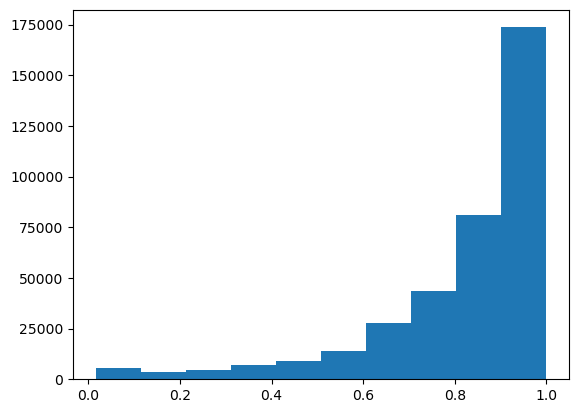

In [39]:
plt.hist(rot_mask_512[np.nonzero(rot_mask_512)])

In [30]:
hp.nside2npix(4096)/hp.nside2npix(512)

64.0

370442
342094


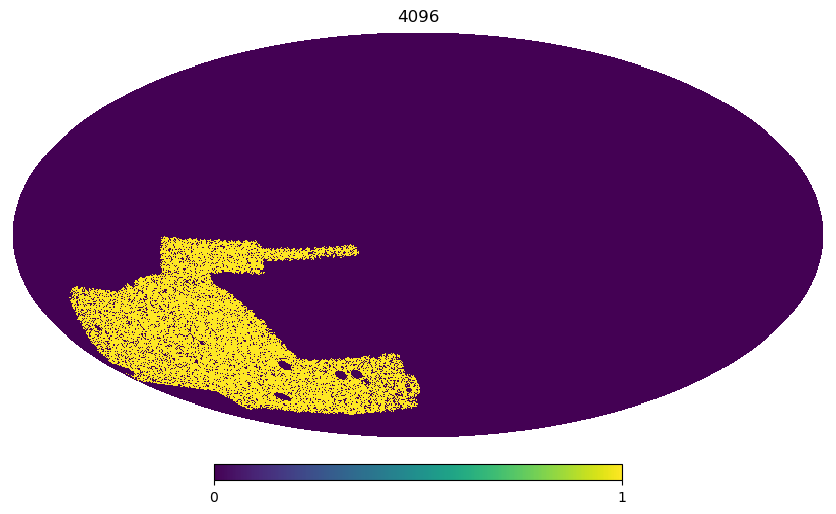

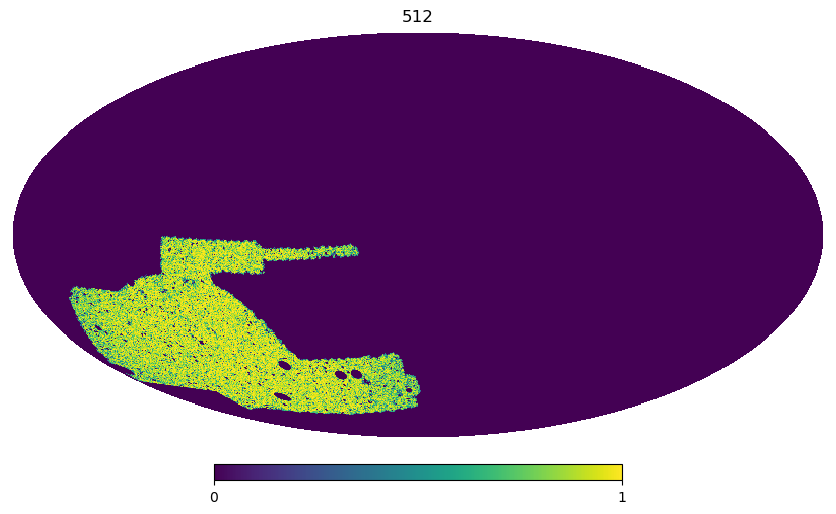

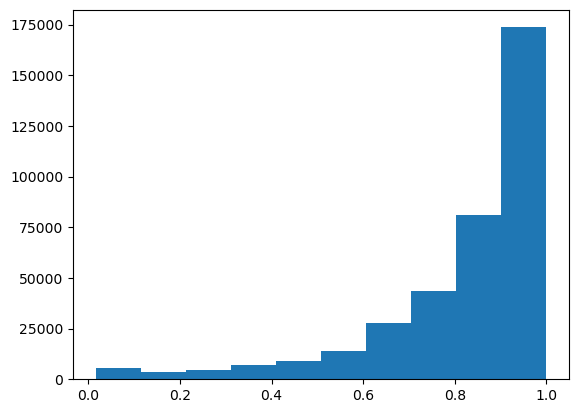

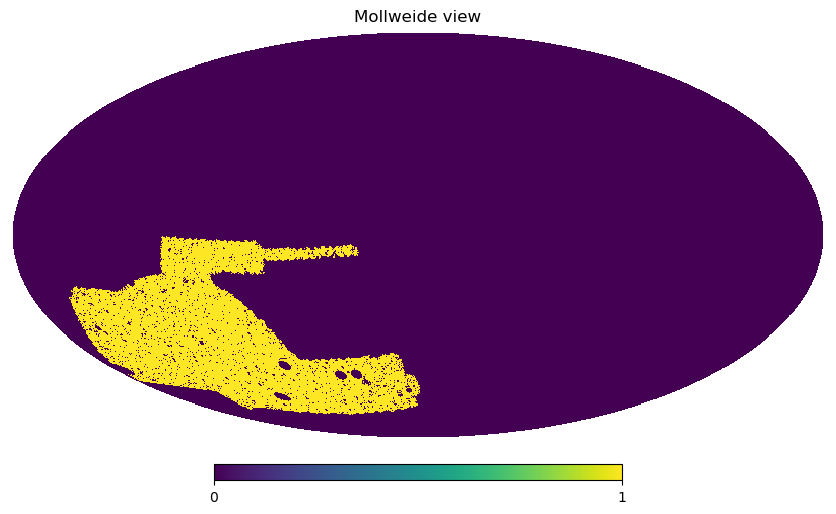

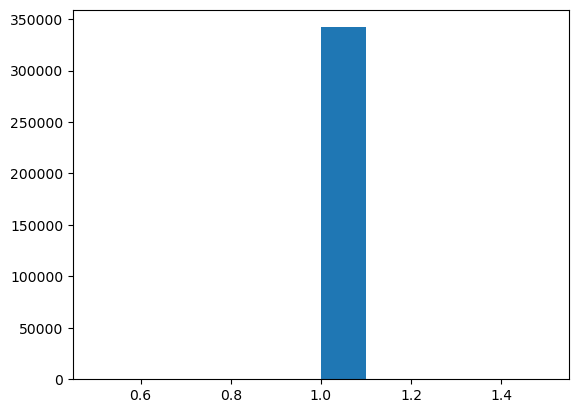

In [45]:
rot_mask_4096 = np.zeros(hp.nside2npix(4096))
rot_mask_4096[np.nonzero(rot_sys_map)] = 1

hp.mollview(rot_mask_4096, title="4096")

rot_mask_512 = hp.ud_grade(rot_mask_4096, nside_out=512, power=0)
hp.mollview(rot_mask_512, title="512")
fig, ax = plt.subplots()
ax.hist(rot_mask_512[np.nonzero(rot_mask_512)])
print(len(np.nonzero(rot_mask_512)[0]))

thresh = 0.5
rot_mask_512[rot_mask_512 < thresh] = 0
rot_mask_512[rot_mask_512 >= thresh] = 1
hp.mollview(rot_mask_512)
fig, ax = plt.subplots()
ax.hist(rot_mask_512[np.nonzero(rot_mask_512)])
print(len(np.nonzero(rot_mask_512)[0]))


In [54]:
np.sum(sys_map[sys_map == 1.0])

180910062.0

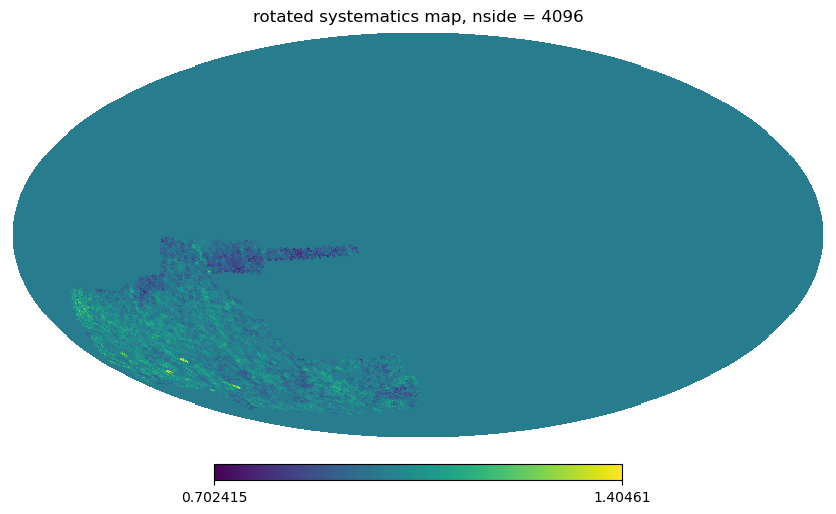

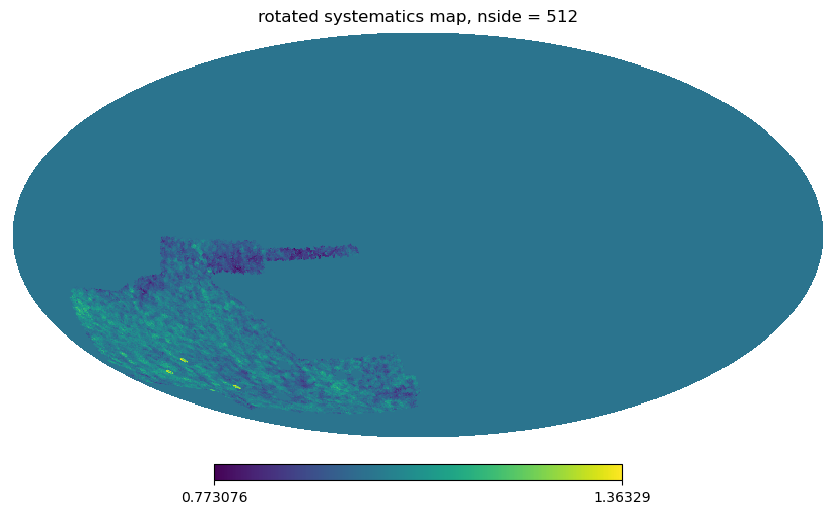

In [52]:
# rotate the mask
rotator = hp.Rotator(rot=(0, 0.125, -1.22), eulertype="Y", deg=False)

rot_sys_map = rotator.rotate_map_pixel(sys_map)

hp.mollview(rot_sys_map, title="rotated systematics map, nside = 4096")

rot_sys_map_512 = hp.ud_grade(rot_sys_map, nside_out=512)
hp.mollview(rot_sys_map_512, title="rotated systematics map, nside = 512")

# thresh_sys_map = rot_sys_map
# thresh_sys_map[rot_sys_map < data["VALUE"].min()] = 0
# hp.mollview(thresh_sys_map, title="rotated systematics map, nside = 512, thresholded")

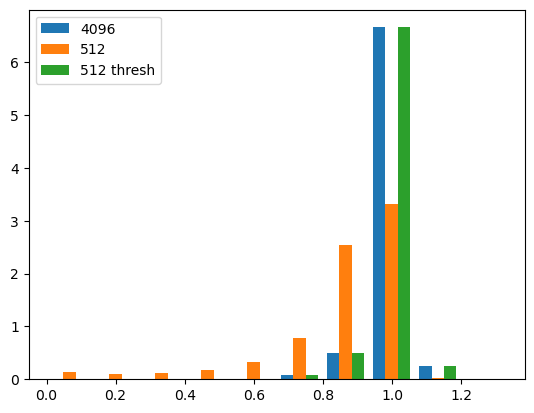

In [13]:
fig, ax = plt.subplots()
ax.hist([rot_sys_map[np.nonzero(rot_sys_map)], rot_sys_map_512[np.nonzero(rot_sys_map_512)], thresh_sys_map[np.nonzero(thresh_sys_map)]], density=True, label=["4096", "512", "512 thresh"])
ax.legend()

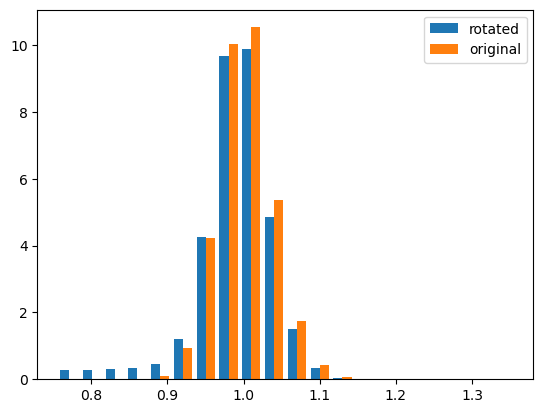

In [18]:
fig, ax = plt.subplots()
ax.hist([rot_sys_map[np.nonzero(rot_sys_map)], data["VALUE"]], density=True, label=["rotated", "original"], bins=20)
ax.legend()

/Users/arne/git/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5
23-05-03 14:04:02  analysis.py INF   Loaded the pixel file 
/Users/arne/git/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5
23-05-03 14:04:03  analysis.py INF   Loaded the pixel file 


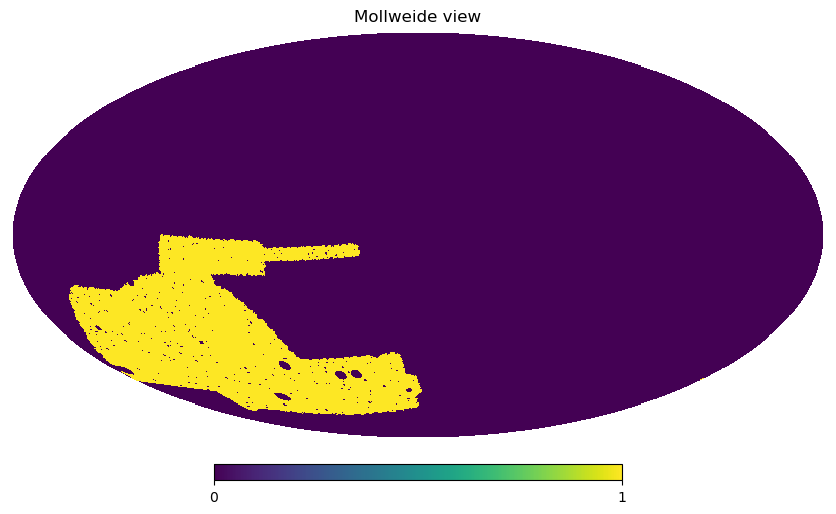

In [23]:
masks_dict = analysis.get_tomo_masks()
dv_maglim_mask = masks_dict["maglim"][:,0]
data_vec_pix, _, _, _ = analysis.load_pixel_file()

maglim_mask = np.zeros(n_pix)
maglim_mask[data_vec_pix] = dv_maglim_mask
maglim_mask = hp.reorder(maglim_mask, inp="NESTED", out="RING")

hp.mollview(maglim_mask)

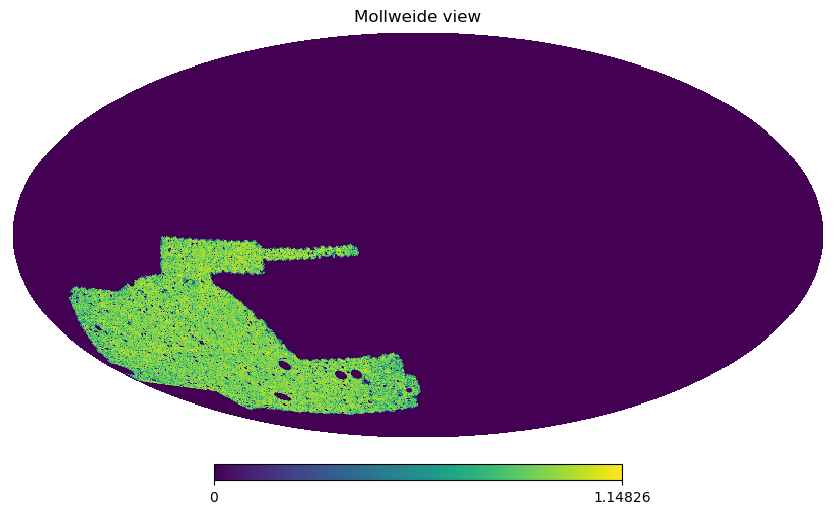

In [28]:
hp.mollview(rot_sys_map*maglim_mask)

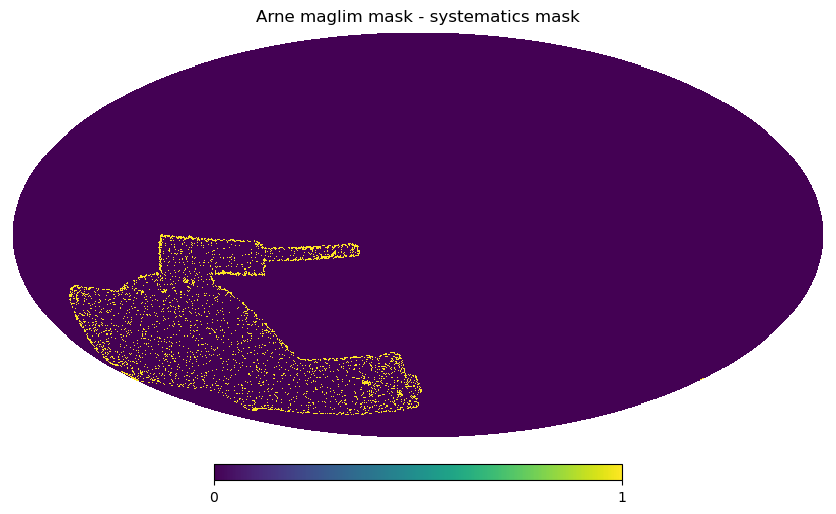

In [60]:
sys_mask = rot_sys_map > data["VALUE"].min()

hp.mollview(maglim_mask - sys_mask, title="Arne maglim mask - systematics mask")

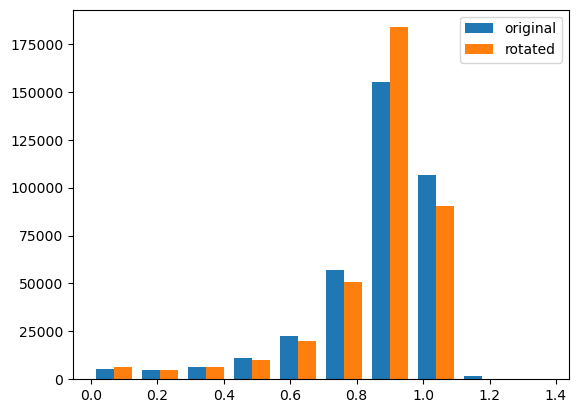

In [61]:
sys_map_512 = hp.ud_grade(sys_map, nside_out=512)

fig, ax = plt.subplots()
ax.hist([sys_map_512[np.nonzero(sys_map_512)], rot_sys_map[np.nonzero(rot_sys_map)]], label=["original", "rotated"])
ax.legend()

In [52]:
np.count_nonzero(sys_mask)

372677

In [53]:
np.count_nonzero(hp.ud_grade(sys_map, nside_out=512))

371000

In [12]:
from msfm.utils import files
import healpy as hp
import numpy as np

In [13]:
tomo_sys_dv = files.get_clustering_systematics("/global/homes/a/athomsen/multiprobe-simulation-forward-model/configs/config.yaml", pixel_type="data_vector")

In [14]:
data_vec_pix, _, _, _ = files.load_pixel_file("/global/homes/a/athomsen/multiprobe-simulation-forward-model/configs/config.yaml")

23-06-14 05:18:31     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 


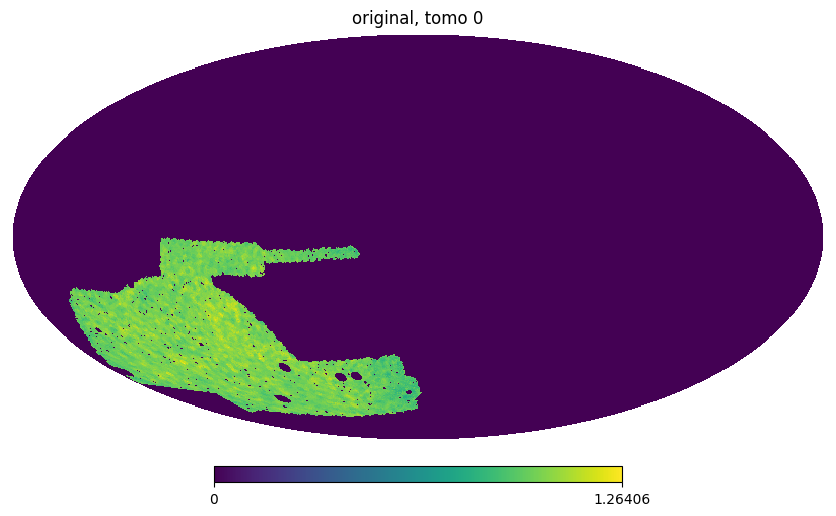

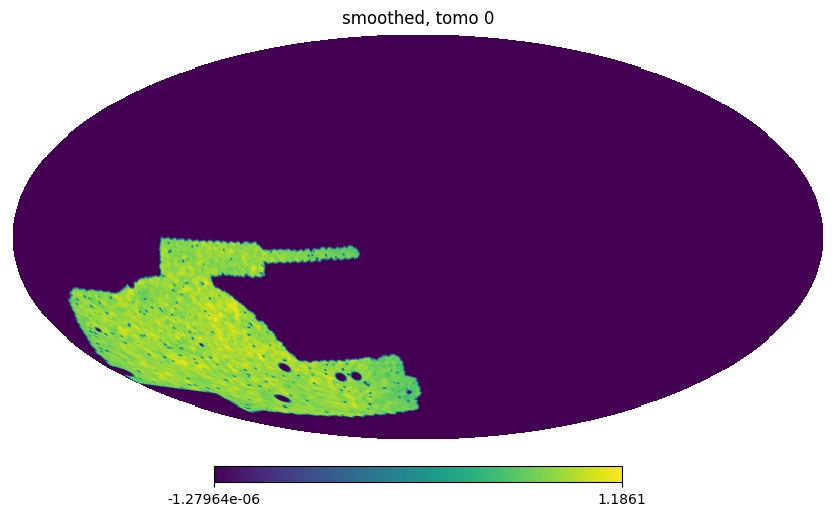

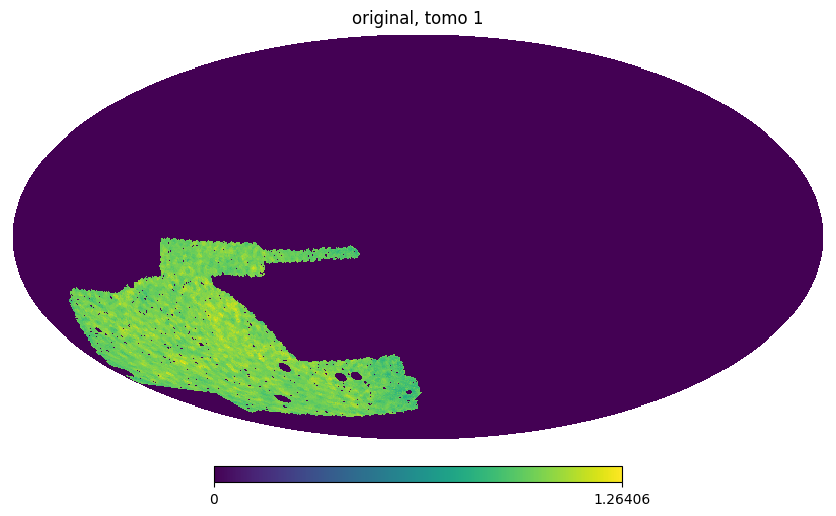

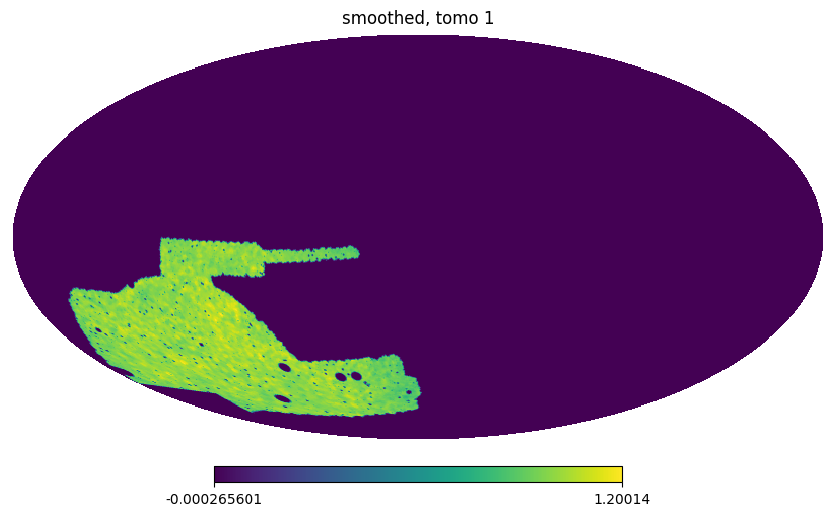

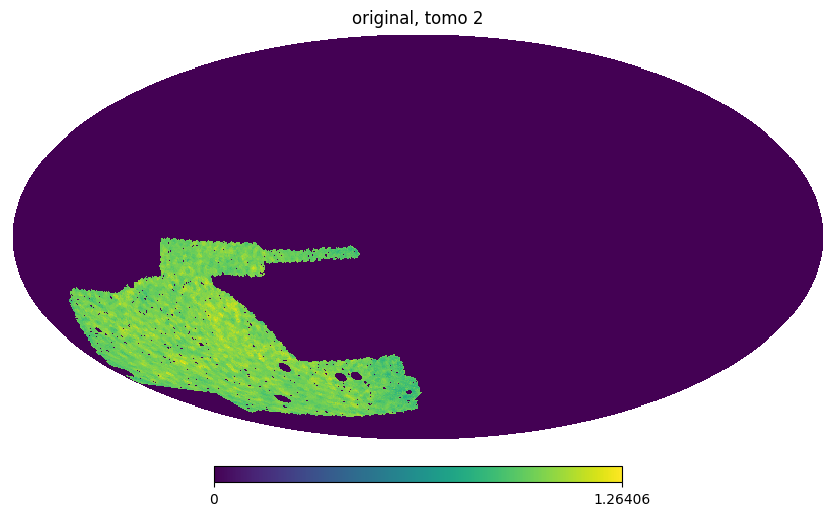

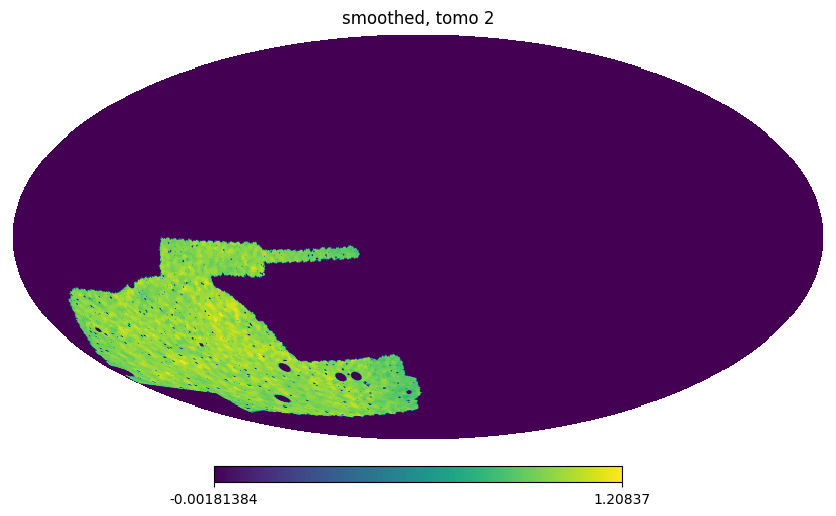

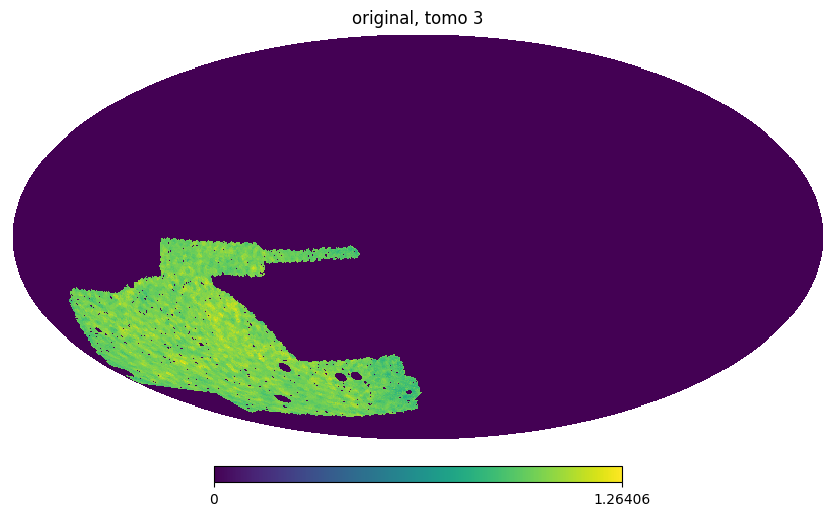

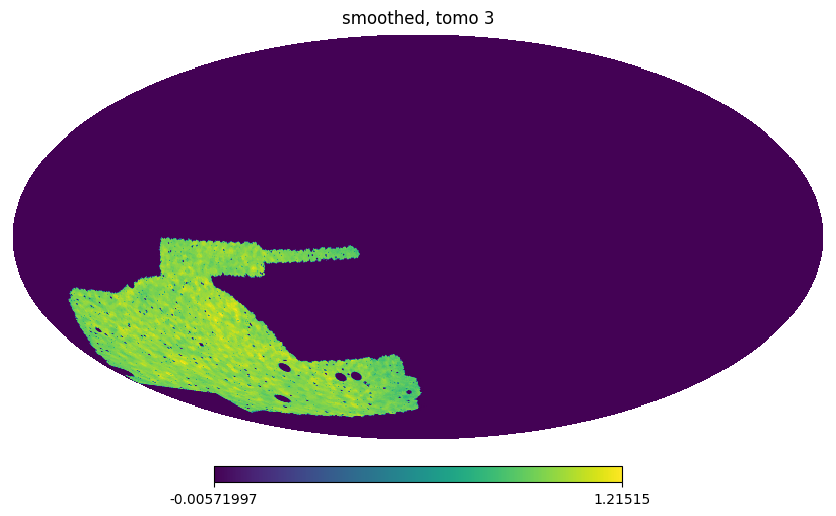

In [21]:
for i_tomo, ell in zip(range(4), [328, 478, 621, 739]):
    hp_map = np.zeros(hp.nside2npix(512))
    hp_map[data_vec_pix] = tomo_sys_dv[:,i]

    hp.mollview(hp_map, nest=True, title=f"original, tomo {i_tomo}")
    
    hp_map = hp.smoothing(hp_map, fwhm=np.pi / ell, nest=True)
    hp.mollview(hp_map, nest=True, title=f"smoothed, tomo {i_tomo}")